In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.9197 - acc: 0.3113 - val_loss: 1.7445 - val_acc: 0.3722
Epoch 2/10
50000/50000 [==============================] - 5s 94us/step - loss: 1.7118 - acc: 0.3871 - val_loss: 1.6661 - val_acc: 0.3998
Epoch 3/10
50000/50000 [==============================] - 5s 99us/step - loss: 1.6140 - acc: 0.4255 - val_loss: 1.5830 - val_acc: 0.4412
Epoch 4/10
50000/50000 [==============================] - 5s 95us/step - loss: 1.5555 - acc: 0.4465 - val_loss: 1.5060 - val_acc: 0.4609
Epoch 5/10
50000/50000 [==============================] - 5s 95us/step - loss: 1.5027 - acc: 0.4660 - val_loss: 1.5369 - val_acc: 0.4572
Epoch 6/10
50000/50000 [==============================] - 5s 98us/step - loss: 1.4662 - acc: 0.4769 - val_loss: 1.5561 - val_acc: 0.4452
Epoch 7/10
50000/50000 [==============================] - 5s 96us/step - loss: 1.4290 - acc: 0.4913 - val_loss: 1.4516 - val_ac

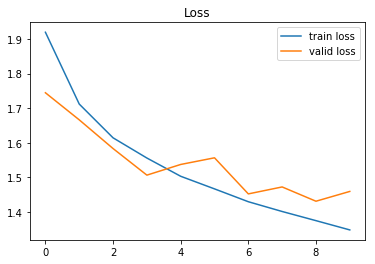

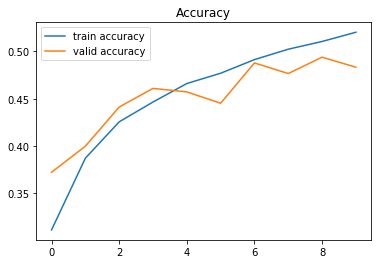

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢